Импорты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Константы

In [3]:
CURR_DIR = '/content/drive/MyDrive'

CURRENCY_FIELDS = ['date', 'nominal', 'value', 'vunitRate']

Загрузка датасета

In [4]:
def create_dataset_from_files(files: list) -> pd.DataFrame:
    df = pd.DataFrame()
    for file in files:
        data = pd.read_csv(file)
        data['date'] = pd.to_datetime(data['date'])
        df = df.append(data, ignore_index=True)
    return df

In [5]:
df = create_dataset_from_files([CURR_DIR + '/outputs/USD_19910101_20231231.csv'])
print(df)

           date  nominal     value  vunitRate
0    1992-07-01        1  125.2600   125.2600
1    1992-07-01        1  123.2600   123.2600
2    1992-07-03        1  134.8000   134.8000
3    1992-07-08        1  130.5000   130.5000
4    1992-07-10        1  130.3000   130.3000
...         ...      ...       ...        ...
7190 2023-10-03        1   98.4785    98.4785
7191 2023-10-04        1   99.2677    99.2677
7192 2023-10-05        1   99.4555    99.4555
7193 2023-10-06        1   99.6762    99.6762
7194 2023-10-07        1  100.4911   100.4911

[7195 rows x 4 columns]


<ipython-input-4-669c864ad7b6>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7195 non-null   datetime64[ns]
 1   nominal    7195 non-null   int64         
 2   value      7195 non-null   float64       
 3   vunitRate  7195 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 225.0 KB


In [7]:
df.columns = ['date', 'nominal', 'value', 'vunit_rate']
print(df.head())

        date  nominal   value  vunit_rate
0 1992-07-01        1  125.26      125.26
1 1992-07-01        1  123.26      123.26
2 1992-07-03        1  134.80      134.80
3 1992-07-08        1  130.50      130.50
4 1992-07-10        1  130.30      130.30


Поиск NaN, Null значений

In [8]:
print(df.isnull().sum())

date          0
nominal       0
value         0
vunit_rate    0
dtype: int64


Замена NaN, Null на среднее значение

In [9]:
df.fillna(df.mean(), inplace=True)

<ipython-input-9-bf934754a5b1>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


Расчет и добавление медианы и среднего значения

In [10]:
median_value = df['vunit_rate'].median()
mean_value = df['vunit_rate'].mean()

df['deviation_from_median'] = df['vunit_rate'] - median_value
df['deviation_from_mean'] = df['vunit_rate'] - mean_value

print(df.head())

        date  nominal   value  vunit_rate  deviation_from_median  \
0 1992-07-01        1  125.26      125.26                93.4756   
1 1992-07-01        1  123.26      123.26                91.4756   
2 1992-07-03        1  134.80      134.80               103.0156   
3 1992-07-08        1  130.50      130.50                98.7156   
4 1992-07-10        1  130.30      130.30                98.5156   

   deviation_from_mean  
0          -363.873466  
1          -365.873466  
2          -354.333466  
3          -358.633466  
4          -358.833466  


Статистическая информация

In [11]:
print(df[['vunit_rate', 'deviation_from_median', 'deviation_from_mean']].describe())

        vunit_rate  deviation_from_median  deviation_from_mean
count  7195.000000            7195.000000         7.195000e+03
mean    489.133466             457.349066        -6.472012e-14
std    1430.417392            1430.417392         1.430417e+03
min       5.960000             -25.824400        -4.831735e+02
25%      28.545900              -3.238500        -4.605876e+02
50%      31.784400               0.000000        -4.573491e+02
75%      65.969050              34.184650        -4.231644e+02
max    5960.000000            5928.215600         5.470867e+03


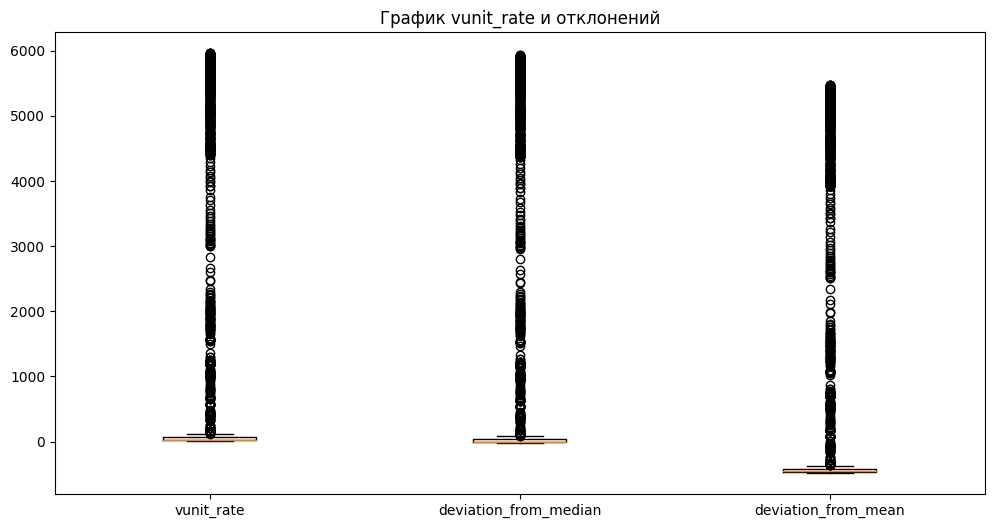

In [12]:
plt.figure(figsize=(12, 6))
plt.boxplot([df['vunit_rate'], df['deviation_from_median'], df['deviation_from_mean']], labels=['vunit_rate', 'deviation_from_median', 'deviation_from_mean'])
plt.title('График vunit_rate и отклонений')
plt.show()

6 пункт

In [13]:
def filter_by_deviation(df, deviation_value):
    filtered_df = df[df['deviation_from_mean'] >= deviation_value]
    return filtered_df

In [14]:
# Значение отклонения от среднего значения курса
deviation_value = 0.1

filtered_df = filter_by_deviation(df, deviation_value)

print(filtered_df.head())

         date  nominal  value  vunit_rate  deviation_from_median  \
58 1993-01-22        1  493.0       493.0               461.2156   
59 1993-01-27        1  568.0       568.0               536.2156   
60 1993-01-29        1  572.0       572.0               540.2156   
61 1993-02-03        1  572.0       572.0               540.2156   
62 1993-02-05        1  572.0       572.0               540.2156   

    deviation_from_mean  
58             3.866534  
59            78.866534  
60            82.866534  
61            82.866534  
62            82.866534  


7 пункт

In [15]:
def filter_by_date(df, start_date, end_date):
    df['date'] = pd.to_datetime(df['date'])
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    return filtered_df

In [16]:
start_date = '2023-01-01'
end_date = '2023-12-31'

filtered_df = filter_by_date(df, start_date, end_date)

print(filtered_df.head())

           date  nominal    value  vunit_rate  deviation_from_median  \
7007 2023-01-10        1  70.3002     70.3002                38.5158   
7008 2023-01-11        1  69.6094     69.6094                37.8250   
7009 2023-01-12        1  69.0202     69.0202                37.2358   
7010 2023-01-13        1  67.7775     67.7775                35.9931   
7011 2023-01-14        1  67.5744     67.5744                35.7900   

      deviation_from_mean  
7007          -418.833266  
7008          -419.524066  
7009          -420.113266  
7010          -421.355966  
7011          -421.559066  


8 пункт

In [17]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month

grouped_df = df.groupby('month')['vunit_rate'].mean()

print(grouped_df)

month
1     426.291255
2     401.696463
3     410.500213
4     410.346824
5     474.616412
6     504.914762
7     503.153294
8     522.590077
9     514.342407
10    559.197919
11    569.704433
12    544.975402
Name: vunit_rate, dtype: float64


9 пункт

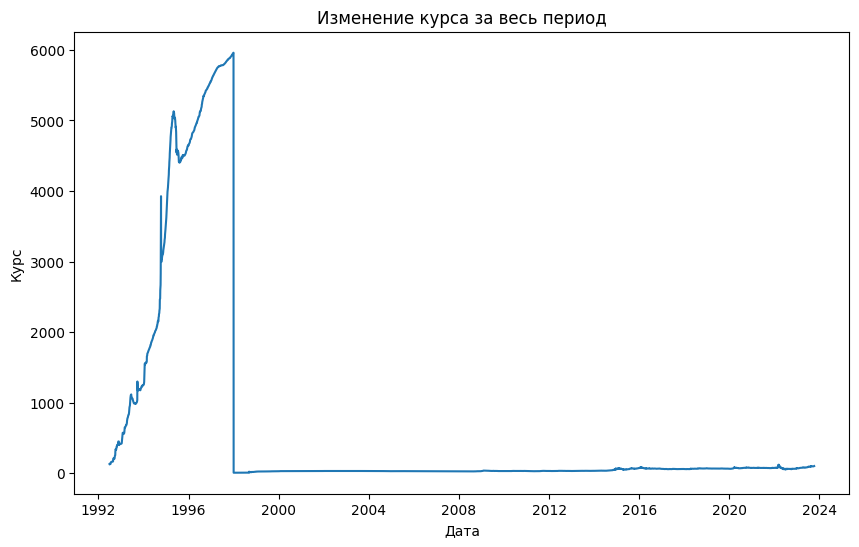

In [18]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['vunit_rate'])

plt.title('Изменение курса за весь период')
plt.xlabel('Дата')
plt.ylabel('Курс')

plt.show()

10 пункт

через matplotlib

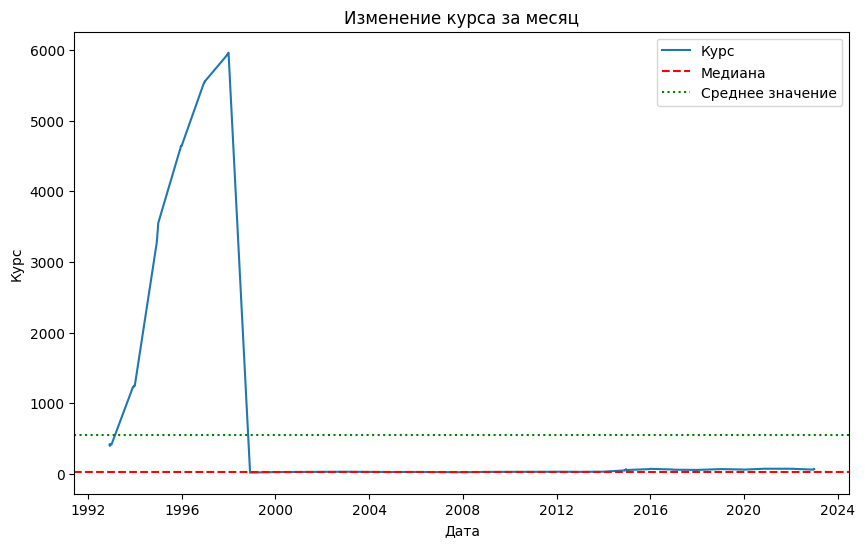

In [19]:
def plot_rate(df, month):
    df_month = df[df['date'].dt.month == month]

    median_value = df_month['vunit_rate'].median()
    mean_value = df_month['vunit_rate'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(df_month['date'], df_month['vunit_rate'], label='Курс')
    plt.axhline(median_value, color='r', linestyle='--', label='Медиана')
    plt.axhline(mean_value, color='g', linestyle=':', label='Среднее значение')

    plt.title('Изменение курса за месяц')
    plt.xlabel('Дата')
    plt.ylabel('Курс')
    plt.legend()

    plt.show()

plot_rate(df, 12)

через seaborn

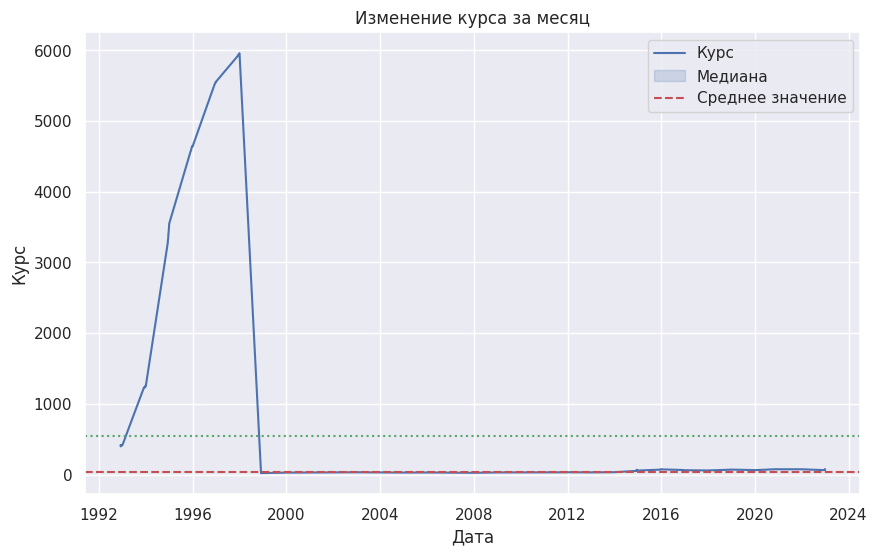

In [20]:
def plot_rate(df, month):
    df_month = df[df['date'].dt.month == month]

    median_value = df_month['vunit_rate'].median()
    mean_value = df_month['vunit_rate'].mean()

    sns.set(rc={"figure.figsize":(10, 6)})
    ax = sns.lineplot(x='date', y='vunit_rate', data=df_month)
    ax.axhline(median_value, color='r', linestyle='--')
    ax.axhline(mean_value, color='g', linestyle=':')
    ax.set_title('Изменение курса за месяц')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Курс')

    ax.legend(['Курс', 'Медиана', 'Среднее значение'])

plot_rate(df, 12)